# Analyzing Data and Predicting Revenue

What is necessary for a movie to achieve a good performance? A good performance is the same of "win an Oscar", or it can be measure by the Gross Revenue Generated?

In this context, what is necessary for a movie to win an *Oscar* or generate a good gross? 
Could IMDB data predict our next winners, comparing caractheristics of each movie?


This notebook has the porpouse of examinating data of IMDB top movies from 1960 to 2024. There is more then 60 years of cinematic history, including over 30,000 movies. This data can be acessed in [Kagle](https://www.kaggle.com/datasets/raedaddala/imdb-movies-from-1960-to-2023/data), but was aggregated in the "Gathering Data" and cleaned in the "Understanding and Cleaning" notebook, both included in this project. For more information, just check this [step](http://localhost:8888/notebooks/pdi%2Fds_nanodegree%2Fimdb_movies%2FExtracting%20and%20Aggregating%20Data.ipynb) first.

In this analysis, the main objective will be check the *correlation between movies features and success in awards*, including features like Gross, Languages and IMDb Rating. So, to introduce the theme and establish this correlaction, we will answer: 
- What are the trends over the last 60 years in movies industry?
- What features are more related with a higher number of nominations and oscars?
- Can we predict the gross worldwide revenue?

## Importing Libraries

In [240]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np

## Reading Dataset

In [241]:
df = pd.read_csv('Final Dataset/final_dataset_cleaned.csv')

In [242]:
df.head()

,id,Title,Year,Duration,MPA,Rating,Votes,budget,grossWorldWide,gross_US_Canada,...,countries_origin_France,countries_origin_Italy,countries_origin_Canada,countries_origin_Others,genres_Drama,genres_Comedy,genres_Thriller,genres_Romance,genres_Action,genres_Others
0,54357,Swiss Family Robinson,1960,126.0,Approved,7.1,19000,5000000.0,40357287.0,40356000.0,...,False,False,False,False,False,False,False,False,False,True
1,54215,Psycho,1960,109.0,R,8.5,741000,806947.0,32066835.0,32000000.0,...,False,False,False,False,False,False,True,False,False,True
2,53604,The Apartment,1960,125.0,Approved,8.3,204000,3000000.0,18778738.0,18600000.0,...,False,False,False,False,True,True,False,True,False,True
3,54331,Spartacus,1960,197.0,PG-13,7.9,146000,12000000.0,1846975.0,1830650.0,...,False,False,False,False,True,False,False,False,False,True
4,53472,Breathless,1960,90.0,Not Rated,7.7,90000,400000.0,594039.0,414173.0,...,True,False,False,False,True,False,False,False,False,True


There are 35 columns in the dataset to be analyzed, which are:

In [243]:
df.columns

Index(['id', 'Title', 'Year', 'Duration', 'MPA', 'Rating', 'Votes', 'budget',
       'grossWorldWide', 'gross_US_Canada', 'opening_weekend_Gross', 'genres',
       'countries_origin', 'Languages', 'nominations', 'oscars',
       'release_date', 'Languages_English', 'Languages_French',
       'Languages_Spanish', 'Languages_Italian', 'Languages_German',
       'Languages_Others', 'countries_origin_United_States',
       'countries_origin_United_Kingdom', 'countries_origin_France',
       'countries_origin_Italy', 'countries_origin_Canada',
       'countries_origin_Others', 'genres_Drama', 'genres_Comedy',
       'genres_Thriller', 'genres_Romance', 'genres_Action', 'genres_Others'],
      dtype='object')

In [244]:
df.shape

(32998, 35)

Also, there are 32,99 lines, which one represents a movie by year of release date. 

## Analyzing Data

In [245]:
##getting aggregations
dict_aggregations = {"id": "count", 
                     "budget": "mean", 
                     "grossWorldWide": "mean", 
                     "opening_weekend_Gross": "mean", 
                     "Duration": "mean", 
                     "Votes": "sum",
                     "Rating": "mean",
                     "nominations": "sum",
                     "oscars": "sum"
                     }

# Grouping data by year
year_trends = df.groupby("Year").agg(dict_aggregations).rename(columns={"id": "total_movies"})

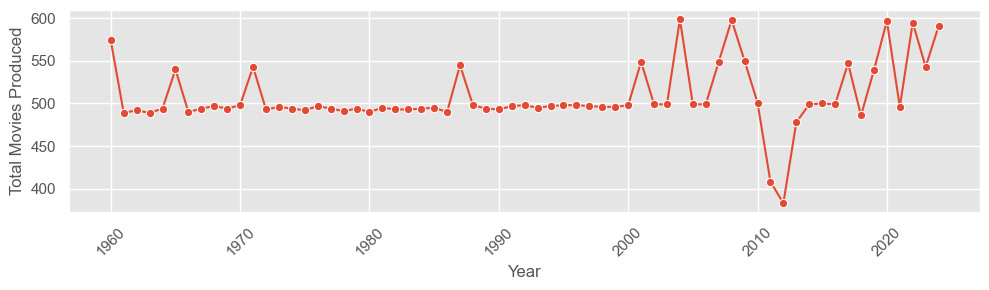

In [246]:
##plotting total movies
fig, axes = plt.subplots(1, 1, figsize=(10, 3), sharex=True)

# Movies produced per year
sns.lineplot(x=year_trends.index, y=year_trends["total_movies"], marker="o")

plt.ylabel("Total Movies Produced")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

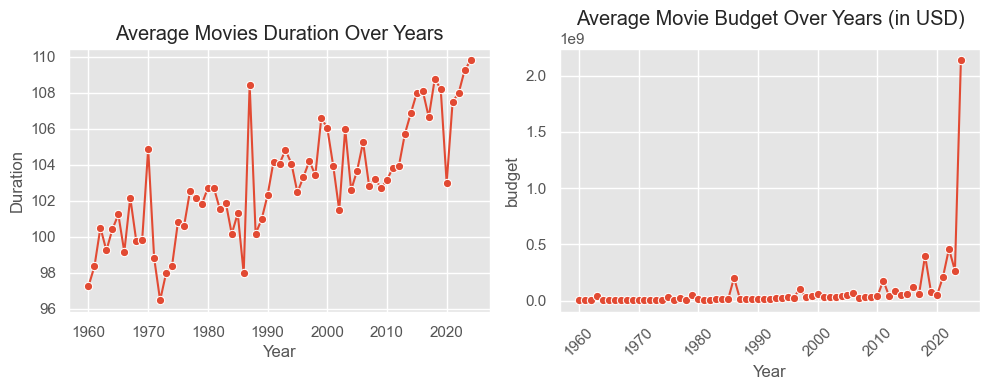

In [247]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)

# Movies produced per year
sns.lineplot(x=year_trends.index, y=year_trends["Duration"], marker="o", ax = axes[0])
axes[0].set_title("Average Movies Duration Over Years")

# Average budget over time
sns.lineplot(x=year_trends.index, y=year_trends["budget"], marker="o", ax=axes[1])
axes[1].set_title("Average Movie Budget Over Years (in USD)")

plt.xlabel("Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [248]:
import numpy as np
df_nn= df[~(df['budget'].isna())]
np.percentile(df_nn['budget'], np.arange(0, 100, 5))

array([1.000e+00, 1.300e+05, 4.000e+05, 9.000e+05, 1.450e+06, 2.032e+06,
       3.000e+06, 4.000e+06, 5.300e+06, 7.000e+06, 9.000e+06, 1.120e+07,
       1.450e+07, 1.800e+07, 2.150e+07, 2.700e+07, 3.500e+07, 4.700e+07,
       7.000e+07, 1.150e+08])

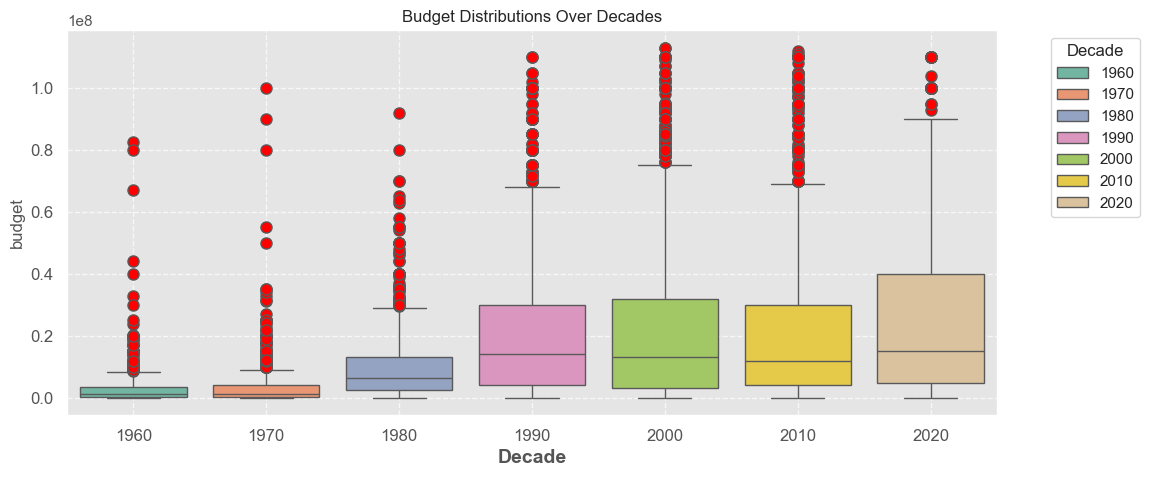

In [249]:
# Criar coluna de décadas
df['Decade'] = (df['Year'] // 10) * 10

# Remover outliers
removing_outlier = df[df['budget'] < 1.150e+08]

# Configurar o estilo do Seaborn
fig, ax = plt.subplots(figsize=(12, 5))
sns.set(style="whitegrid")

# Criar boxplot por década
sns.boxplot(
    x='Decade',
    y='budget',
    data=removing_outlier, 
    hue='Decade', 
    palette="Set2",
    flierprops=dict(marker='o', markerfacecolor='red', markersize=8)
)

plt.title("Budget Distributions Over Decades")
plt.xlabel('Decade', fontsize=14, fontweight='bold')

# Ajustes finais no layout
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar a grade
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar a legenda para a direita
plt.legend(title='Decade', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar o gráfico
plt.show()


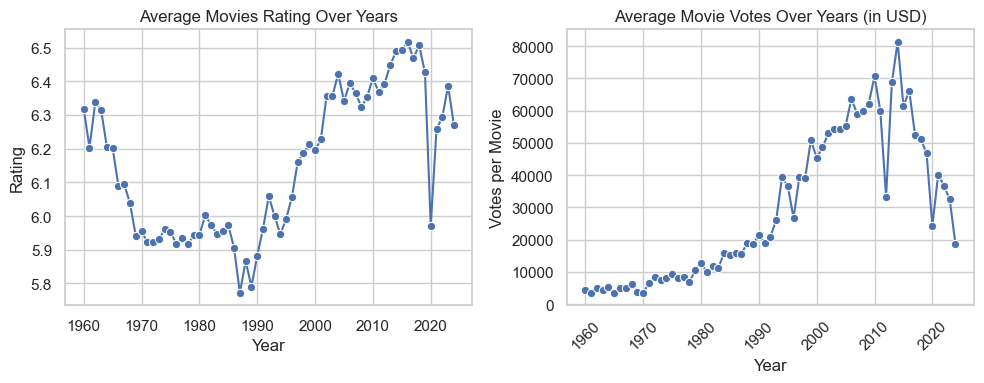

In [250]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)

# Movies produced per year
sns.lineplot(x=year_trends.index, y=year_trends["Rating"], marker="o", ax = axes[0])
axes[0].set_title("Average Movies Rating Over Years")

# Average budget over time
sns.lineplot(x=year_trends.index, y=year_trends["Votes"]/year_trends["total_movies"], marker="o", ax=axes[1])
axes[1].set_title("Average Movie Votes Over Years (in USD)")
axes[1].set_ylabel("Votes per Movie")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

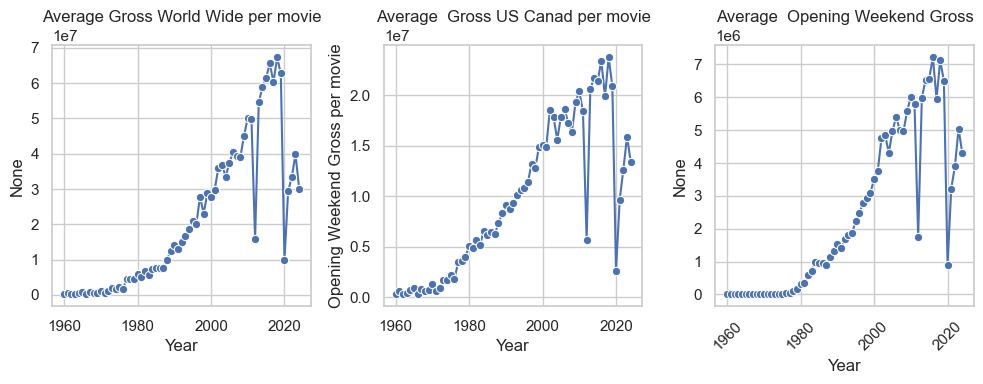

In [251]:
dict_aggregations_gross = {"id": "count",
                     "grossWorldWide": "sum", 
                     "opening_weekend_Gross": "sum", 
                     "gross_US_Canada": "sum", 
                     }

# Grouping data by year
year_trends_gross = df.groupby("Year").agg(dict_aggregations_gross).rename(columns={"id": "total_movies"})

fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharex=True)

# Movies produced per year
sns.lineplot(x=year_trends_gross.index, y=year_trends_gross["grossWorldWide"]/year_trends_gross['total_movies'], marker="o", ax = axes[0])
axes[0].set_title("Average Gross World Wide per movie")
axes[1].set_ylabel("Gross World Wide per movie")

# Average budget over time
sns.lineplot(x=year_trends_gross.index, y=year_trends_gross["gross_US_Canada"]/year_trends_gross['total_movies'], marker="o", ax=axes[1])
axes[1].set_title("Average  Gross US Canad per movie")
axes[1].set_ylabel("Gross US Canada per movie")
# Average budget over time
sns.lineplot(x=year_trends_gross.index, y=year_trends_gross["opening_weekend_Gross"]/year_trends_gross['total_movies'], marker="o", ax=axes[2])
axes[2].set_title("Average  Opening Weekend Gross")
axes[1].set_ylabel("Opening Weekend Gross per movie")

plt.xlabel("Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [252]:
dict_aggregations_lang = {"id": "count",
                           "Languages_English": "sum", 
                           "Languages_French": "sum", 
                           "Languages_Spanish": "sum", 
                           "Languages_Italian": "sum", 
                           "Languages_German": "sum", 
                           "Languages_Others": "sum", 
                     }

# Grouping data by year
year_trends_lang = df.groupby("Year").agg(dict_aggregations_lang).rename(columns={"id": "total_movies"})

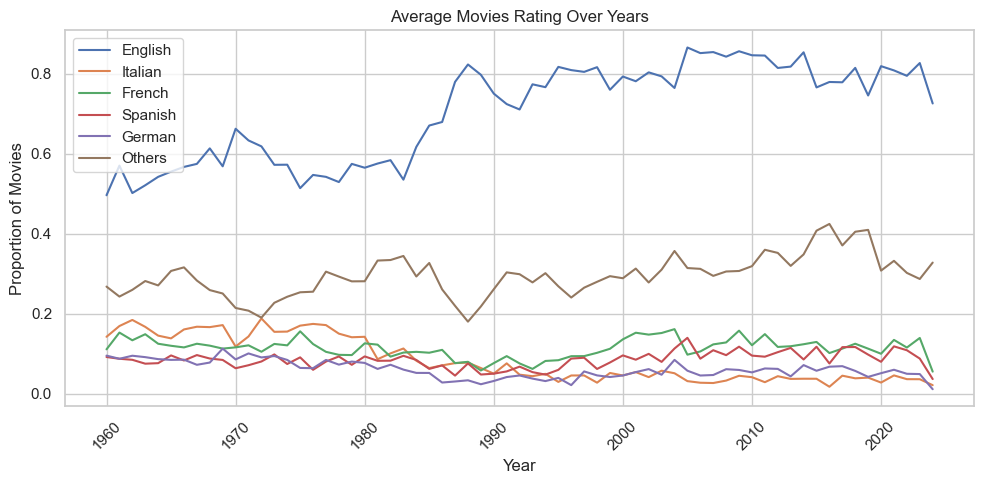

In [253]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar a figura principal
fig, ax = plt.subplots(figsize=(10, 5))

# Adicionar todas as linhas de tendências no mesmo gráfico
sns.lineplot(x=year_trends_lang.index, y=year_trends_lang["Languages_English"]/year_trends_lang['total_movies'], ax=ax, label="English")
sns.lineplot(x=year_trends_lang.index, y=year_trends_lang["Languages_Italian"]/year_trends_lang['total_movies'], ax=ax, label="Italian")
sns.lineplot(x=year_trends_lang.index, y=year_trends_lang["Languages_French"]/year_trends_lang['total_movies'], ax=ax, label="French")
sns.lineplot(x=year_trends_lang.index, y=year_trends_lang["Languages_Spanish"]/year_trends_lang['total_movies'], ax=ax, label="Spanish")
sns.lineplot(x=year_trends_lang.index, y=year_trends_lang["Languages_German"]/year_trends_lang['total_movies'], ax=ax, label="German")
sns.lineplot(x=year_trends_lang.index, y=year_trends_lang["Languages_Others"]/year_trends_lang['total_movies'], ax=ax, label="Others")

# Definir título e label dos eixos
ax.set_title("Average Movies Rating Over Years")
plt.xlabel("Year")
plt.ylabel("Proportion of Movies")

# Rotacionar os valores do eixo X para melhor leitura
plt.xticks(rotation=45)

# Incluir a legenda
plt.legend()

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()

The analysis of movie data over the past years or decades reveals how moviews production changed over the years. 

The movies duration appears to increase significantly in the past years, mainly after the 90's, until 2024, achieving an average of 110 minutes. Before the 90's, the main duration was between 96 and 102 minutes.

As weel as the duration, the budget increased significantly too. After 90's, the median budget spent in a movie was the same of the 75% value before that. In addition, the number os outliers increased, and the distribution of these number seems more a long tail.

Since the begining, English-language films consistently dominating the market. While the proportion of movies in other languages, such as Italian, French, and Spanish, remains relatively low, there have been slight fluctuations in their share. Also, the Italian Languagens seems to loose more share then the others.

In terms of voting trends, there has been an observable increase in audience participation, as indicated by the rising average number of votes per movie. This suggests a growing engagement from the audience over time. Althought the increasing in number of votes, the rating per movie just increased after 2020, movement the started in 90's too, after several year of low ratings. 

As expected, the gross per movie increased too, even the world wide, even the opening weekend or US Canada gross.

Overall, the analysis underscores the resilience of English-language films in maintaining their prominence and the gradually increasing involvement of audiences, reflecting broader trends in global cinema consumption.

## What makes a movie win more nominations or oscars?

In [254]:
# Splitting genres into lists
df["genres"] = df["genres"].dropna().str.split(", ")
# Expanding genres into rows for better analysis
df_exploded = df.explode("genres")
df_exploded["genres"] = df_exploded["genres"].str.replace("[", "")
df_exploded["genres"] = df_exploded["genres"].str.replace("]", "")
df_exploded["genres"].head()

0                  'Survival'
0                 'Adventure'
0                    'Family'
1      'Psychological Horror'
1    'Psychological Thriller'
Name: genres, dtype: object

In [255]:
# Grouping by genres and counting movie production
genres_nominations = {"id": "count",
                      "nominations": "sum", 
                      "oscars": "sum", 
                      }
genres_trends = df_exploded.groupby("genres").agg(genres_nominations)

C:\Users\luiza.furlan_ifood\AppData\Local\Temp\ipykernel_5820\338274792.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres_trends_.index, y=genres_trends_.id, palette="coolwarm")


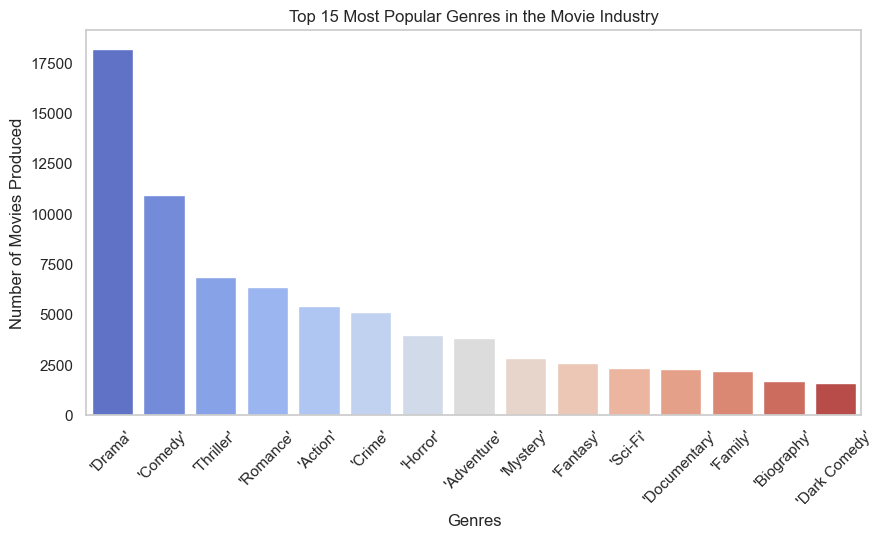

In [256]:
genres_trends_ = genres_trends.sort_values(by = 'id', ascending=False).head(15)

# Plotting top 10 genres
plt.figure(figsize=(10, 5))
sns.barplot(x=genres_trends_.index, y=genres_trends_.id, palette="coolwarm")
plt.title("Top 15 Most Popular Genres in the Movie Industry")
plt.xlabel("Genres")
plt.ylabel("Number of Movies Produced")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

C:\Users\luiza.furlan_ifood\AppData\Local\Temp\ipykernel_5820\463352695.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres_trends_1.index, y=genres_trends_1.nominations, palette="coolwarm", ax=axes[0])
C:\Users\luiza.furlan_ifood\AppData\Local\Temp\ipykernel_5820\463352695.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\luiza.furlan_ifood\AppData\Local\Temp\ipykernel_5820\463352695.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres_trends_2.index, y=genres_trends_2.oscars, palette="coolwarm", ax=axes[1])
C:\Us

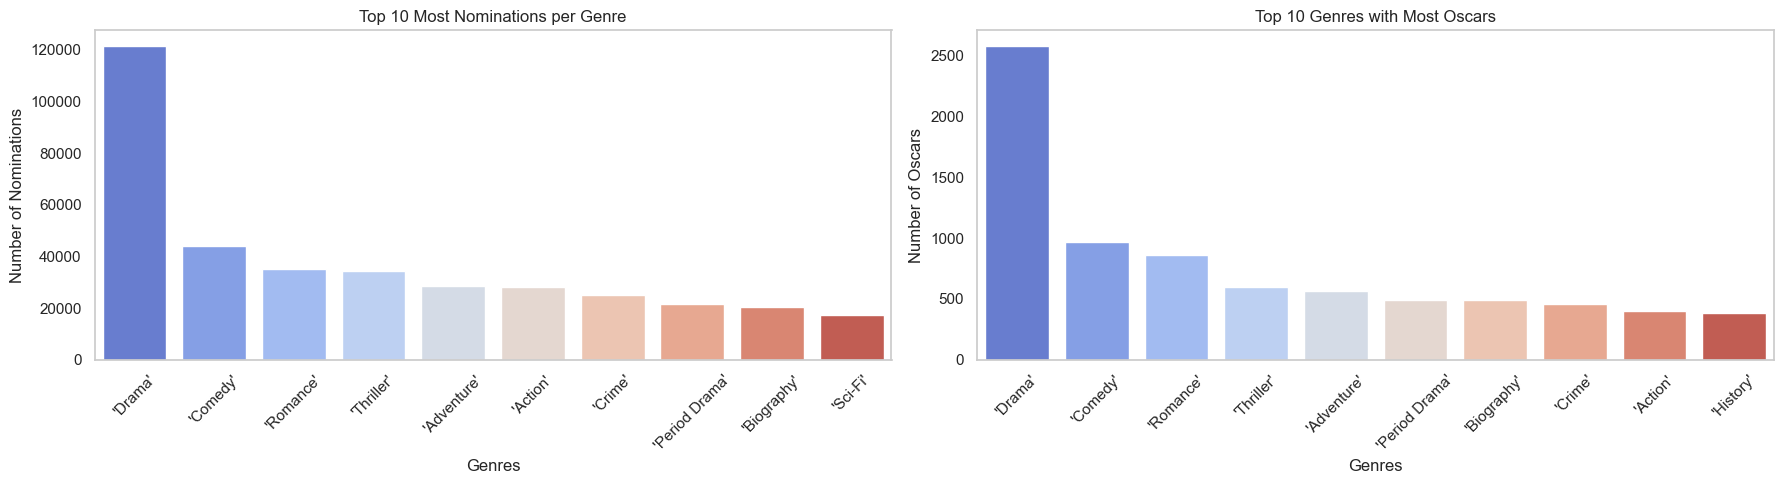

In [257]:
# Supondo que 'genres_trends' esteja definido
genres_trends_1 = genres_trends.sort_values(by='nominations', ascending=False).head(10)
genres_trends_2 = genres_trends.sort_values(by='oscars', ascending=False).head(10)

# Criar subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Gráfico do lado esquerdo - Nomeações
sns.barplot(x=genres_trends_1.index, y=genres_trends_1.nominations, palette="coolwarm", ax=axes[0])
axes[0].set_title("Top 10 Most Nominations per Genre")
axes[0].set_xlabel("Genres")
axes[0].set_ylabel("Number of Nominations")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].grid(axis='y')

# Gráfico do lado direito - Oscars
sns.barplot(x=genres_trends_2.index, y=genres_trends_2.oscars, palette="coolwarm", ax=axes[1])
axes[1].set_title("Top 10 Genres with Most Oscars")
axes[1].set_xlabel("Genres")
axes[1].set_ylabel("Number of Oscars")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].grid(axis='y')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()

C:\Users\luiza.furlan_ifood\AppData\Local\Temp\ipykernel_5820\506606439.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres_trends_1.index, y=genres_trends_1.percent_nominations, palette="coolwarm", ax=axes[0])
C:\Users\luiza.furlan_ifood\AppData\Local\Temp\ipykernel_5820\506606439.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\luiza.furlan_ifood\AppData\Local\Temp\ipykernel_5820\506606439.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres_trends_2.index, y=genres_trends_2.percent_oscars, palette="coolwarm", 

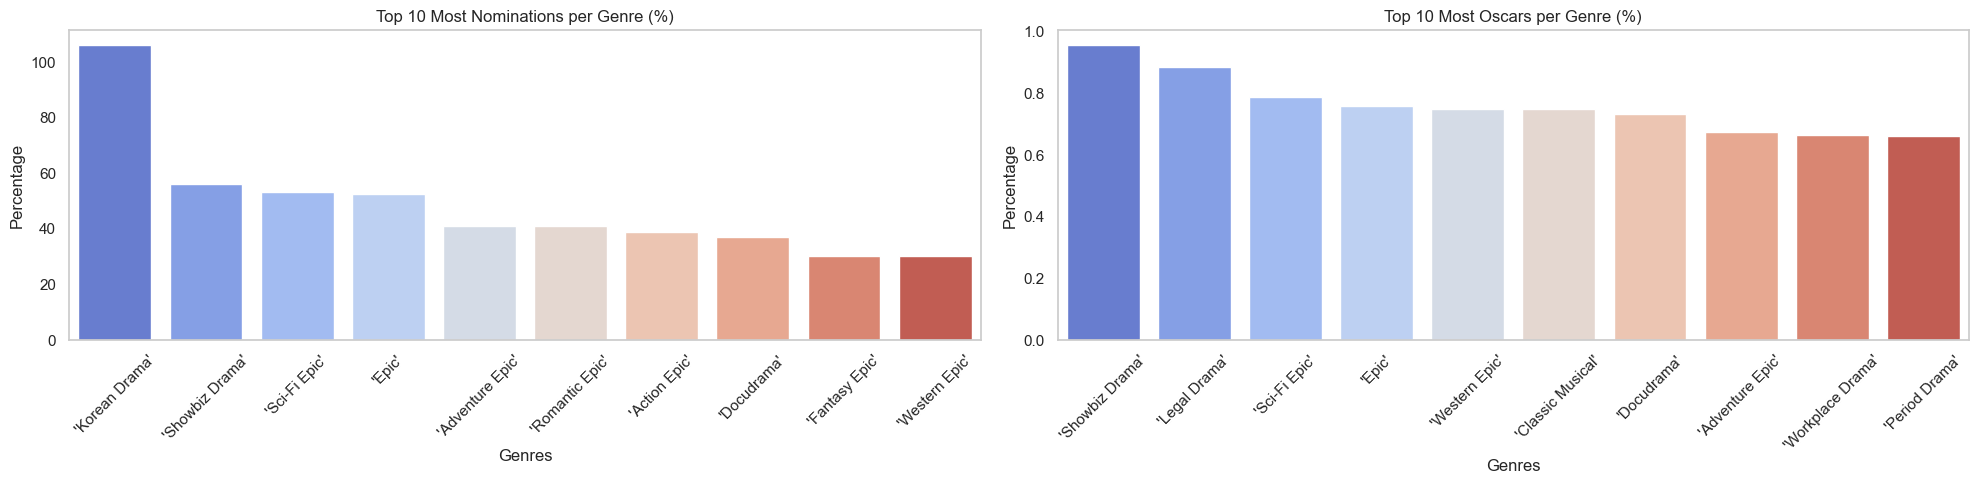

In [258]:
# Supondo que 'genres_trends' esteja definido
# Primeiro gráfico baseado em nomeações
genres_trends['percent_nominations'] = genres_trends['nominations'] / genres_trends['id']
genres_trends_1 = genres_trends.sort_values(by='percent_nominations', ascending=False).head(10)

# Segundo gráfico baseado em Oscars
genres_trends['percent_oscars'] = genres_trends['oscars'] / genres_trends['id']
genres_trends_2 = genres_trends[genres_trends['id'] > 10].sort_values(by='percent_oscars', ascending=False).head(10)

# Criar subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Gráfico do lado esquerdo - Nomeações
sns.barplot(x=genres_trends_1.index, y=genres_trends_1.percent_nominations, palette="coolwarm", ax=axes[0])
axes[0].set_title("Top 10 Most Nominations per Genre (%)")
axes[0].set_xlabel("Genres")
axes[0].set_ylabel("Percentage")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].grid(axis='y')

# Gráfico do lado direito - Oscars
sns.barplot(x=genres_trends_2.index, y=genres_trends_2.percent_oscars, palette="coolwarm", ax=axes[1])
axes[1].set_title("Top 10 Most Oscars per Genre (%)")
axes[1].set_xlabel("Genres")
axes[1].set_ylabel("Percentage")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].grid(axis='y')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()

In [259]:
# Exemplo de função para verificar a presença de um gênero
def contem_genero(lista, genero):
    return genero in lista

# Aplicar a função na coluna 'genres'
genero_desejado = "'Korean Drama'"
df[df['genres'].apply(lambda x: contem_genero(x, genero_desejado))][["Title", "nominations", "budget"]]

,Title,nominations,budget
21961,Memories of Murder,10,2800000.0
29689,Parasite,266,11400000.0
32538,Exhuma,9,NaN


C:\Users\luiza.furlan_ifood\AppData\Local\Temp\ipykernel_5820\3309102797.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres_trends_.index, y=genres_trends_.percent, palette="coolwarm")


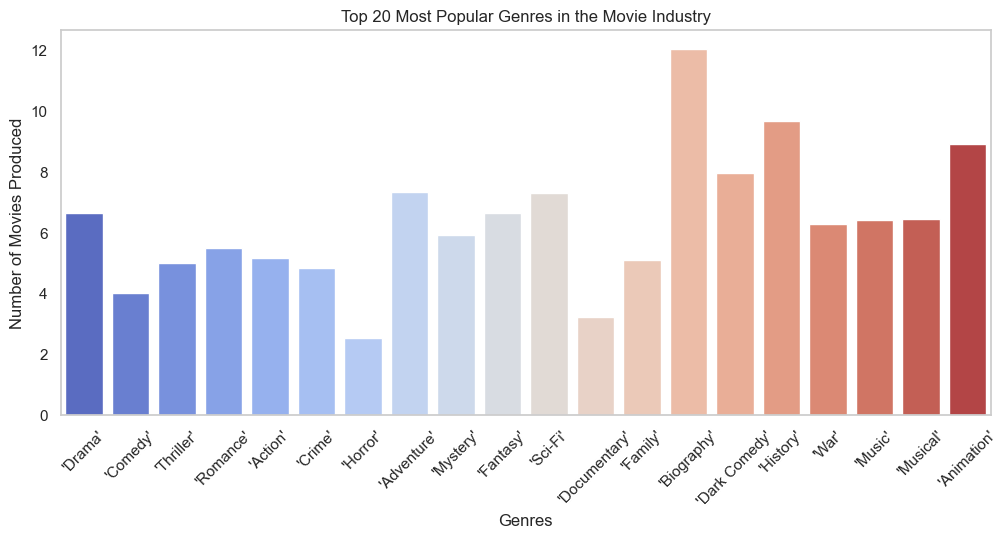

In [260]:
genres_trends['percent'] = genres_trends['nominations']/genres_trends['id']
genres_trends_ = genres_trends.sort_values(by = 'id', ascending=False).head(20)

# Plotting top 10 genres
plt.figure(figsize=(12, 5))
sns.barplot(x=genres_trends_.index, y=genres_trends_.percent, palette="coolwarm")
plt.title("Top 20 Most Popular Genres in the Movie Industry")
plt.xlabel("Genres")
plt.ylabel("Number of Movies Produced")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

C:\Users\luiza.furlan_ifood\AppData\Local\Temp\ipykernel_5820\2976131015.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres_trends_.index, y=genres_trends_.percent, palette="coolwarm")


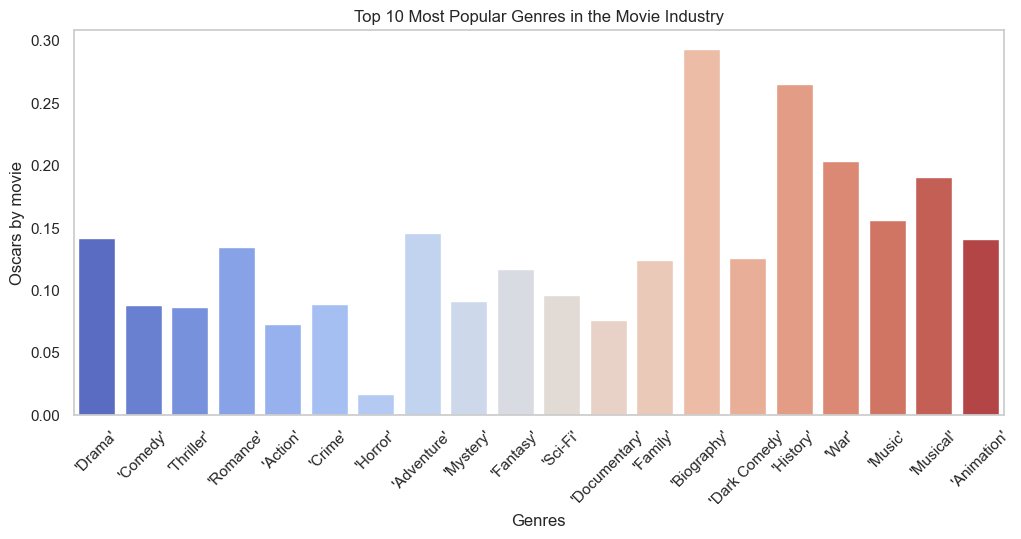

In [261]:
genres_trends['percent'] = genres_trends['oscars']/genres_trends['id']
genres_trends_ = genres_trends.sort_values(by = 'id', ascending=False).head(20)

# Plotting top 10 genres
plt.figure(figsize=(12, 5))
sns.barplot(x=genres_trends_.index, y=genres_trends_.percent, palette="coolwarm")
plt.title("Top 10 Most Popular Genres in the Movie Industry")
plt.xlabel("Genres")
plt.ylabel("Oscars by movie")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

C:\Users\luiza.furlan_ifood\AppData\Local\Temp\ipykernel_5820\3902424152.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='oscars_label', y='Duration', data=df_, ax=axes[1], palette='muted', inner='quartile')


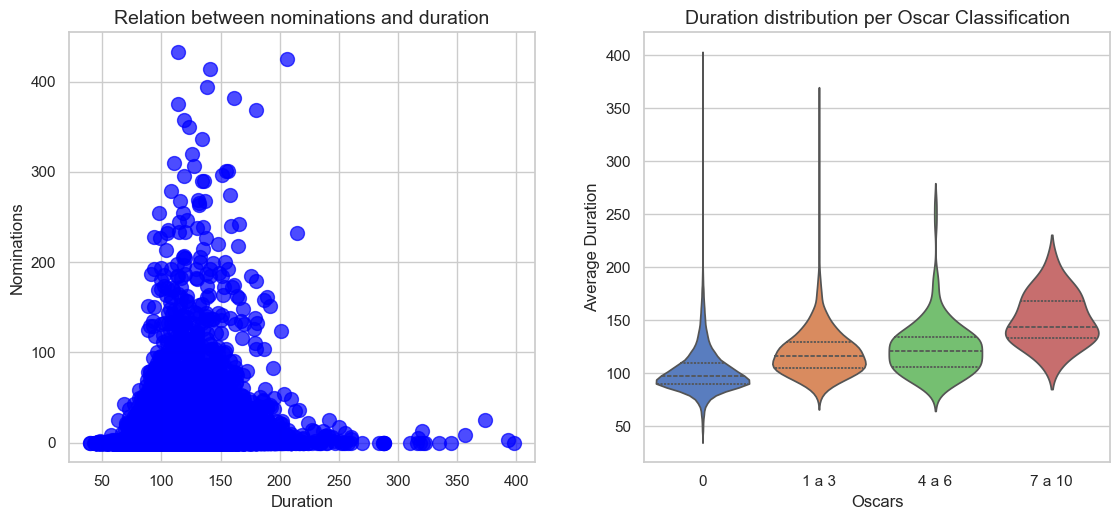

In [262]:
df = df.fillna({'oscars': 0})

# Defining ranges
bins = [0, 1, 3, 6, 10]
labels = ['0', '1 a 3', '4 a 6', '7 a 10']

# Creating oscars label
df['oscars_label'] = pd.cut(df['oscars'], bins=bins, labels=labels, include_lowest=True)
df_ = df[df['Duration']<400]

# Definindo um estilo
# plt.style.use('seaborn-whitegrid')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Primeiro subplot
df_.plot(kind='scatter', x='Duration', y='nominations', ax=axes[0], color='blue', marker='o', s=100, alpha=0.7)
axes[0].set_title('Relation between nominations and duration', fontsize=14)
axes[0].set_xlabel('Duration', fontsize=12)
axes[0].set_ylabel('Nominations', fontsize=12)

# Segundo subplot - Gráfico de Violino
sns.violinplot(x='oscars_label', y='Duration', data=df_, ax=axes[1], palette='muted', inner='quartile')
axes[1].set_title('Duration distribution per Oscar Classification', fontsize=14)
axes[1].set_xlabel('Oscars', fontsize=12)
axes[1].set_ylabel('Average Duration', fontsize=12)

plt.tight_layout(pad=3.0)
plt.show()

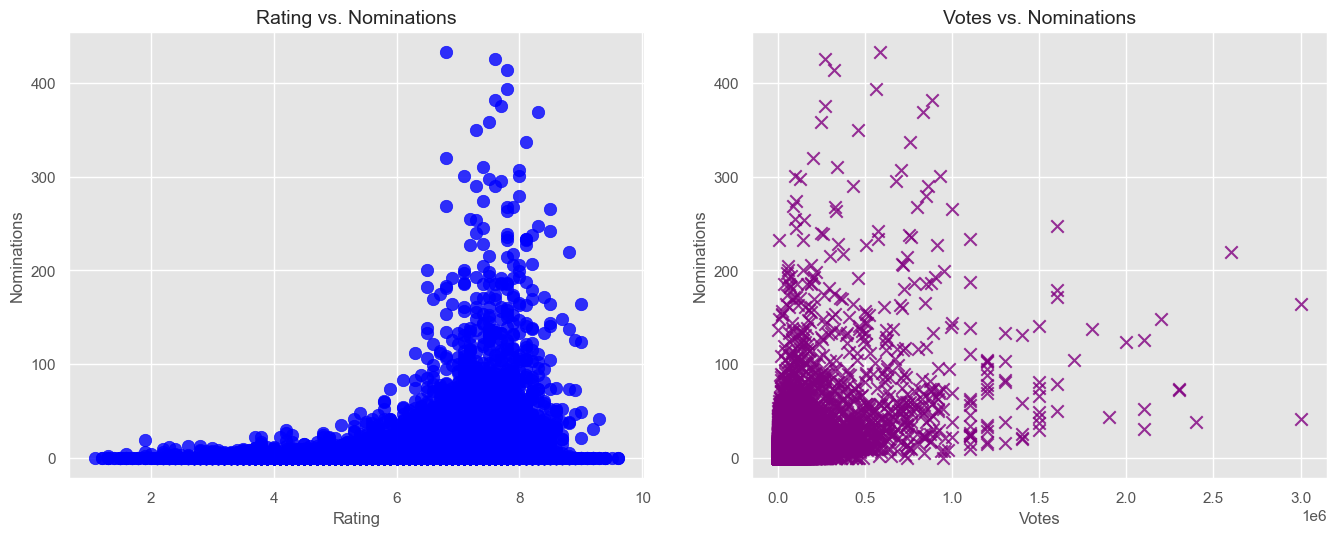

In [263]:
# Estilizar plotagem
plt.style.use('ggplot')  # Tente 'ggplot' ou 'bmh'

# Criar subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Primeiro gráfico de dispersão - Rating vs. Nominations
df.plot(kind='scatter', x='Rating', y='nominations', ax=axes[0], color='blue', marker='o', s=80, alpha=0.8)
axes[0].set_title('Rating vs. Nominations', fontsize=14)
axes[0].set_xlabel('Rating', fontsize=12)
axes[0].set_ylabel('Nominations', fontsize=12)

# Segundo gráfico de dispersão - Votes vs. Nominations
df.plot(kind='scatter', x='Votes', y='nominations', ax=axes[1], color='purple', marker='x', s=80, alpha=0.8)
axes[1].set_title('Votes vs. Nominations', fontsize=14)
axes[1].set_xlabel('Votes', fontsize=12)
axes[1].set_ylabel('Nominations', fontsize=12)

plt.tight_layout(pad=3.0)
plt.show()

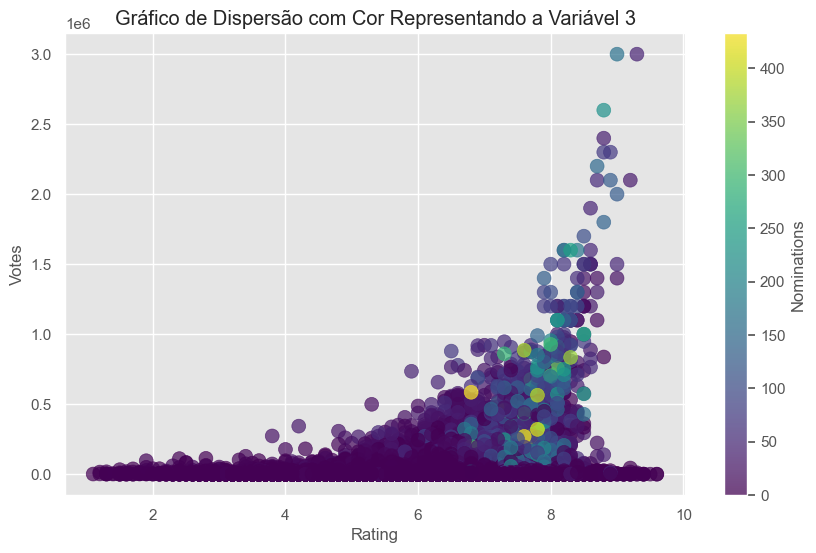

In [264]:
# Criar um gráfico de dispersão 3D
plt.figure(figsize=(10, 6))

# Use 'var1', 'var2', 'var3' para suas variáveis contínuas
plt.scatter(df['Rating'], df['Votes'], c=df['nominations'], cmap='viridis', s=100, alpha=0.7)

plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Gráfico de Dispersão com Cor Representando a Variável 3')
plt.colorbar(label='Nominations')

plt.show()

In [265]:
df_filtered = df.dropna(subset = ['budget', 'opening_weekend_Gross', 'grossWorldWide', 'gross_US_Canada'])

C:\Users\luiza.furlan_ifood\AppData\Local\Temp\ipykernel_5820\764882529.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='oscars_label', y='budget', data=df_filtered_wot_out, ax=axes[1], palette='muted', inner='quartile')


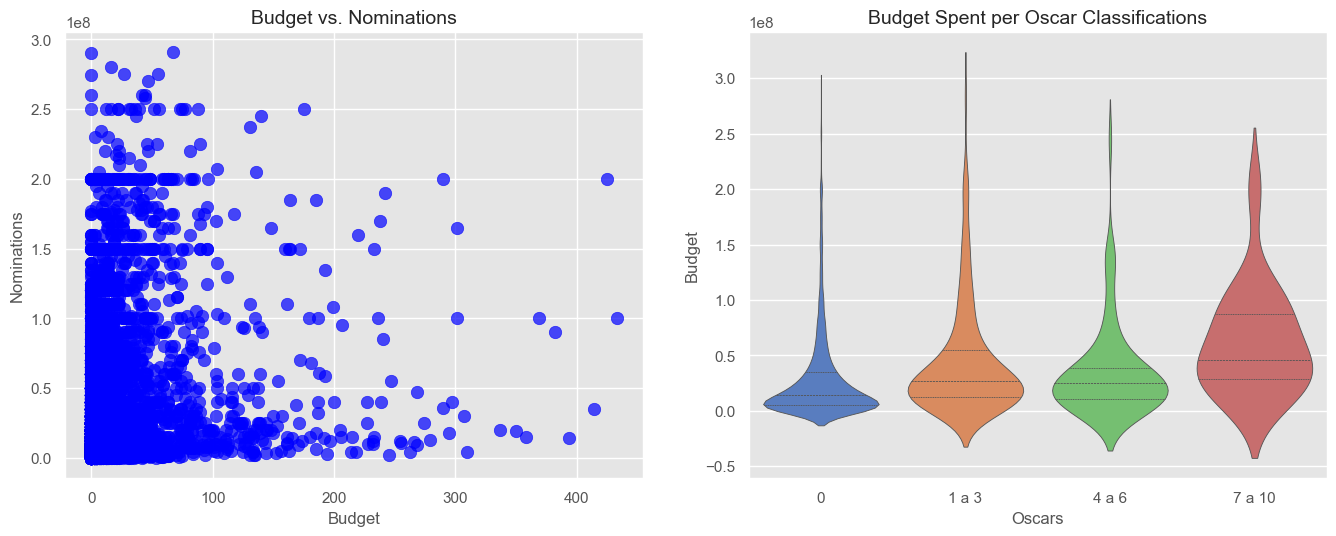

In [266]:
# Filtering outliers
df_filtered_wot_out = df_filtered[df_filtered['budget'] < 300000000]

# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

df_filtered_wot_out.plot(kind='scatter', x='nominations', y='budget', ax=axes[0], color='blue', marker='o', s=80, alpha=0.7)
axes[0].set_title('Budget vs. Nominations', fontsize=14)
axes[0].set_xlabel('Budget', fontsize=12)
axes[0].set_ylabel('Nominations', fontsize=12)

# Segundo subplot - Gráfico de Violino
sns.violinplot(x='oscars_label', y='budget', data=df_filtered_wot_out, ax=axes[1], palette='muted', inner='quartile')
axes[1].set_title('Budget Spent per Oscar Classifications', fontsize=14)
axes[1].set_xlabel('Oscars', fontsize=12)
axes[1].set_ylabel('Budget', fontsize=12)

plt.tight_layout(pad=3.0)
plt.show()

In [267]:
# Splitting genres into lists
df["countries_origin"] = df["countries_origin"].dropna().str.split(", ")
# Expanding genres into rows for better analysis
df_exploded = df.explode("countries_origin")
df_exploded["countries_origin"] = df_exploded["countries_origin"].str.replace("[", "")
df_exploded["countries_origin"] = df_exploded["countries_origin"].str.replace("]", "")
df_exploded["countries_origin"].head()

# Grouping by genres and counting movie production
countries_nominations = {"id": "count",
                      "nominations": "sum", 
                      "oscars": "sum", 
                      "budget": "sum", 
                      }

countrys_trends = df_exploded.groupby("countries_origin").agg(countries_nominations)

C:\Users\luiza.furlan_ifood\AppData\Local\Temp\ipykernel_5820\696385678.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=countrys_trends_.index, y=countrys_trends_.percent, palette="coolwarm")


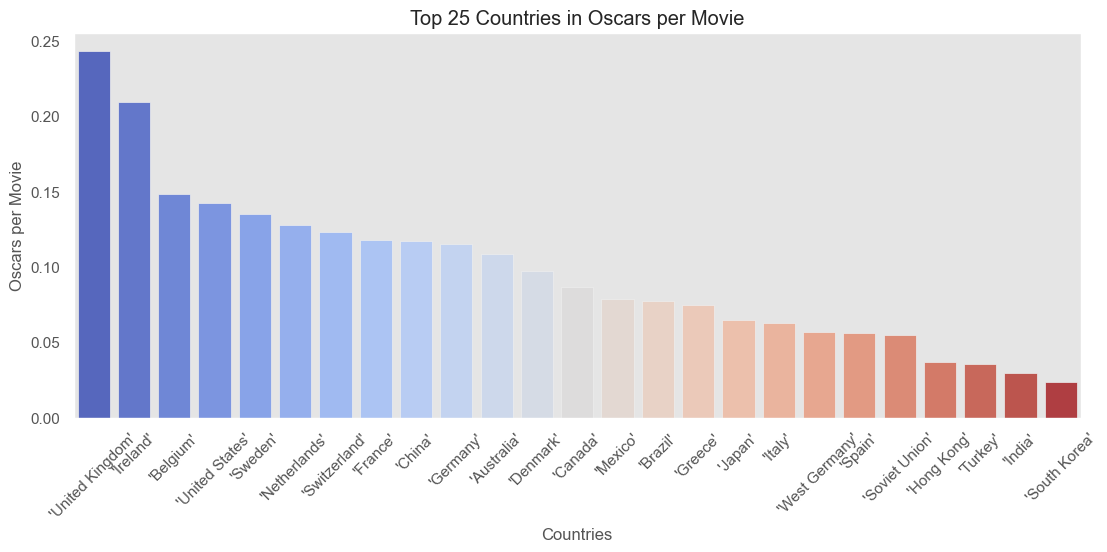

In [268]:
countrys_trends['percent'] = countrys_trends['oscars']/countrys_trends['id']
countrys_trends_ = countrys_trends.sort_values(by = 'id', ascending=False).head(25).sort_values(by = 'percent', ascending=False)

# Plotting top 10 genres
plt.figure(figsize=(13, 5))
sns.barplot(x=countrys_trends_.index, y=countrys_trends_.percent, palette="coolwarm")
plt.title("Top 25 Countries in Oscars per Movie")
plt.xlabel("Countries")
plt.ylabel("Oscars per Movie")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

C:\Users\luiza.furlan_ifood\AppData\Local\Temp\ipykernel_5820\3289648579.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=countrys_trends_.index, y=countrys_trends_.percent, palette="coolwarm")


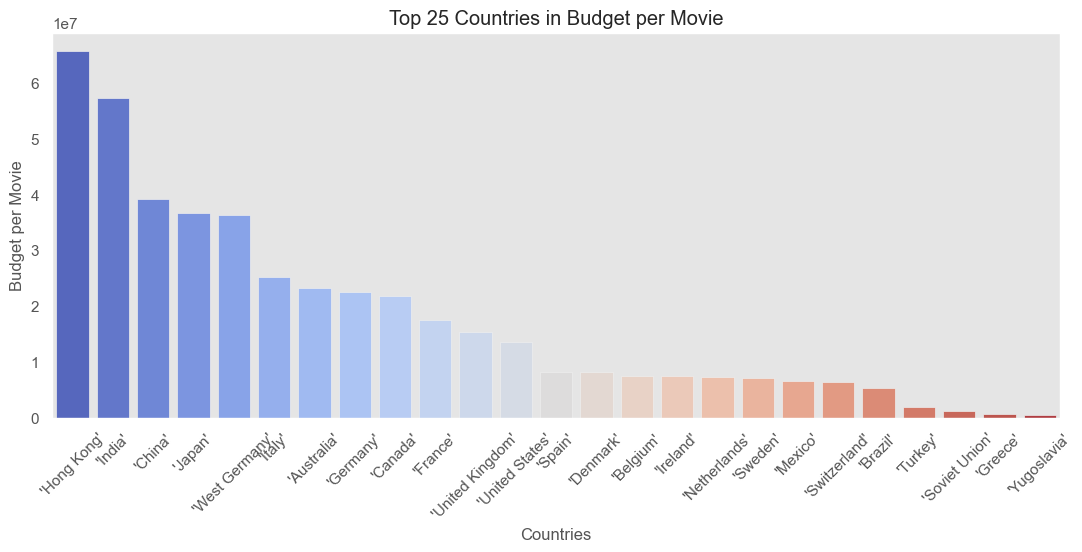

In [269]:
countrys_trends['percent'] = countrys_trends['budget']/countrys_trends['id']
##removing south korea
countrys_trends_ = countrys_trends[countrys_trends['percent']<1.6e+09].sort_values(by = 'id', ascending=False).head(25).sort_values(by = 'percent', ascending=False)

# Plotting top 10 genres
plt.figure(figsize=(13, 5))
sns.barplot(x=countrys_trends_.index, y=countrys_trends_.percent, palette="coolwarm")
plt.title("Top 25 Countries in Budget per Movie")
plt.xlabel("Countries")
plt.ylabel("Budget per Movie")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

In [270]:
# Splitting genres into lists
df["Languages"] = df["Languages"].dropna().str.split(", ")
# Expanding genres into rows for better analysis
df_exploded = df.explode("Languages")
df_exploded["Languages"] = df_exploded["Languages"].str.replace("[", "")
df_exploded["Languages"] = df_exploded["Languages"].str.replace("]", "")
df_exploded["Languages"].head()

# Grouping by genres and counting movie production
Languages_nominations = {"id": "count",
                      "nominations": "sum", 
                      "oscars": "sum", 
                      }

Languages_nominations_trends = df_exploded.groupby("Languages").agg(Languages_nominations)

C:\Users\luiza.furlan_ifood\AppData\Local\Temp\ipykernel_5820\3340267961.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Languages_nominations_trends_.index, y=Languages_nominations_trends_.percent, palette="coolwarm")


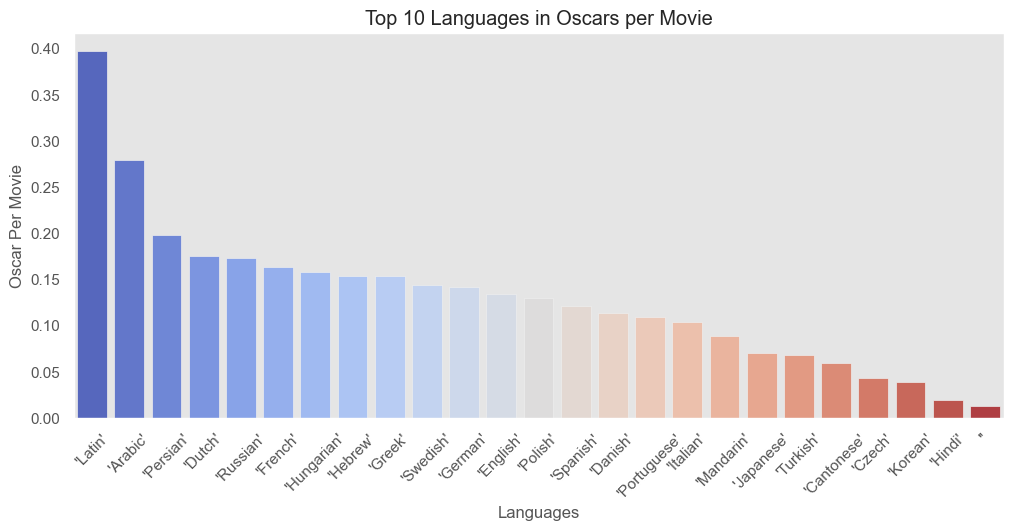

In [271]:
Languages_nominations_trends['percent'] = Languages_nominations_trends['oscars']/Languages_nominations_trends['id']
Languages_nominations_trends_ = Languages_nominations_trends.sort_values(by = 'id', ascending=False).head(25).sort_values(by = 'percent', ascending=False)

# Plotting top 10 genres
plt.figure(figsize=(12, 5))
sns.barplot(x=Languages_nominations_trends_.index, y=Languages_nominations_trends_.percent, palette="coolwarm")
plt.title("Top 10 Languages in Oscars per Movie")
plt.xlabel("Languages")
plt.ylabel("Oscar Per Movie")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

C:\Users\luiza.furlan_ifood\AppData\Local\Temp\ipykernel_5820\3297562011.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Languages_nominations_trends_.index, y=Languages_nominations_trends_.oscars, palette="coolwarm")


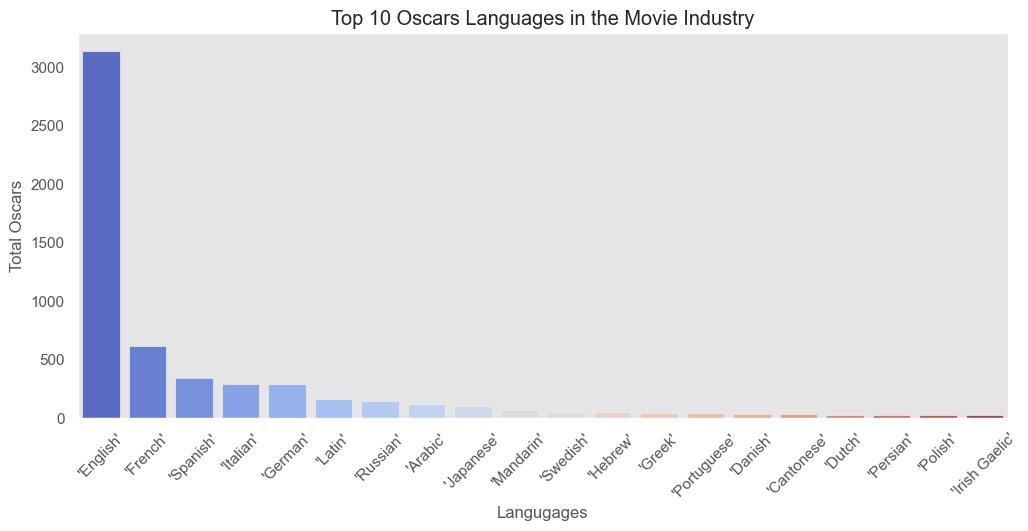

In [272]:
Languages_nominations_trends['percent'] = Languages_nominations_trends['oscars']/Languages_nominations_trends['id']
Languages_nominations_trends_ = Languages_nominations_trends.sort_values(by = 'oscars', ascending=False).head(20)

# Plotting top 10 genres
plt.figure(figsize=(12, 5))
sns.barplot(x=Languages_nominations_trends_.index, y=Languages_nominations_trends_.oscars, palette="coolwarm")
plt.title("Top 10 Oscars Languages in the Movie Industry")
plt.xlabel("Langugages")
plt.ylabel("Total Oscars")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

The number of Oscars and Nominations have relations with some aspects in a movie. 

As can be seem, Drama, Comedy, Thriller, Romance and Action are the top 5 genres produced. However, Drama, Comedy, Thriller, Romance and Adventure are the top 5 genres with more nominations and Oscars. Although the hgh number of acchivements, percentually this number descrease, and these genres barely appear in the top 10. This can be explained by the high number of movies produced, not linerly followed by the number of awards. Opposite to that, Parasite is the only Korean Drama presented in the dataset, and the movie has a nomination. So a fairly comparision can be calculating the Oscars by movie of top 20 genres produced.In this approach, the biggest winner is Biography, followed by History and War. 

In addition, the duration of a movie is important in the number of nominations and oscas. As can be seen, most of the nominations are from movies that has 100 to 200 minutes. This can be logical, since the number with movies between this range of duration is higher. However, classifying the movies between winners and not winners, it appears that oscar winner moviews have a higher median of duration, mainly moviews that awarded 7 or more Oscars.

Finally, comparing countries and Languages with the Oscars and nominations, as far as we can see, English Movies has the most number of Oscars. This may be an expected correlation, since probably is dificult to win a competition like that without Englsh as one of the Languages. However, looking for others Languages, there are a high number of oscars per movie when selecting the Latin Language. Also, the countrie with the highest number of oscar per movie is United Kingdon, althought the fact that it is only the 12ª countrie with higher budget spent per movie. Therefore, the countrie has a good relation between investment and awards. The same can be observed about Brazil: is top 15 in oscars per movie, and top 21 in budget per movie.


## Predicting Revenue

In [273]:
df.head()

,id,Title,Year,Duration,MPA,Rating,Votes,budget,grossWorldWide,gross_US_Canada,...,countries_origin_Canada,countries_origin_Others,genres_Drama,genres_Comedy,genres_Thriller,genres_Romance,genres_Action,genres_Others,Decade,oscars_label
0,54357,Swiss Family Robinson,1960,126.0,Approved,7.1,19000,5000000.0,40357287.0,40356000.0,...,False,False,False,False,False,False,False,True,1960,0
1,54215,Psycho,1960,109.0,R,8.5,741000,806947.0,32066835.0,32000000.0,...,False,False,False,False,True,False,False,True,1960,4 a 6
2,53604,The Apartment,1960,125.0,Approved,8.3,204000,3000000.0,18778738.0,18600000.0,...,False,False,True,True,False,True,False,True,1960,0
3,54331,Spartacus,1960,197.0,PG-13,7.9,146000,12000000.0,1846975.0,1830650.0,...,False,False,True,False,False,False,False,True,1960,0
4,53472,Breathless,1960,90.0,Not Rated,7.7,90000,400000.0,594039.0,414173.0,...,False,False,True,False,False,False,False,True,1960,0


In [274]:
df = df.dropna(subset=['grossWorldWide'], axis=0)

In [275]:
df.isna().mean()

id                                 0.000000
Title                              0.000000
Year                               0.000000
Duration                           0.000000
MPA                                0.111172
Rating                             0.000000
Votes                              0.000000
budget                             0.481930
grossWorldWide                     0.000000
gross_US_Canada                    0.068257
opening_weekend_Gross              0.151774
genres                             0.000000
countries_origin                   0.000000
Languages                          0.000000
nominations                        0.000000
oscars                             0.000000
release_date                       0.000000
Languages_English                  0.000000
Languages_French                   0.000000
Languages_Spanish                  0.000000
Languages_Italian                  0.000000
Languages_German                   0.000000
Languages_Others                

In [276]:
num_vars = df.select_dtypes(include=['float', 'int']).columns

In [277]:
for col in num_vars:
    df[col].fillna((df[col].mean()), inplace=True)

C:\Users\luiza.furlan_ifood\AppData\Local\Temp\ipykernel_5820\1577560915.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna((df[col].mean()), inplace=True)
C:\Users\luiza.furlan_ifood\AppData\Local\Temp\ipykernel_5820\1577560915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna((df[col].mean()), inplace=True)


In [278]:
df.dtypes

id                                    int64
Title                                object
Year                                  int64
Duration                            float64
MPA                                  object
Rating                              float64
Votes                                 int64
budget                              float64
grossWorldWide                      float64
gross_US_Canada                     float64
opening_weekend_Gross               float64
genres                               object
countries_origin                     object
Languages                            object
nominations                           int64
oscars                                int64
release_date                        float64
Languages_English                      bool
Languages_French                       bool
Languages_Spanish                      bool
Languages_Italian                      bool
Languages_German                       bool
Languages_Others                

In [279]:
df.drop(['id', 'Title', 'genres', 'countries_origin', 'Languages', 'MPA'], axis=1, inplace = True)

C:\Users\luiza.furlan_ifood\AppData\Local\Temp\ipykernel_5820\1897702841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['id', 'Title', 'genres', 'countries_origin', 'Languages', 'MPA'], axis=1, inplace = True)


In [280]:
df.drop(['Year', 'release_date'], axis=1, inplace = True)

C:\Users\luiza.furlan_ifood\AppData\Local\Temp\ipykernel_5820\2047476950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Year', 'release_date'], axis=1, inplace = True)


In [281]:
columns_to_corr = set(df.columns) - set(['Languages_English', 'Languages_French', 'Languages_Spanish',
                                   'Languages_Italian', 'Languages_German', 'Languages_Others',
                                   'countries_origin_United_States', 'countries_origin_United_Kingdom',
                                   'countries_origin_France', 'countries_origin_Italy',
                                   'countries_origin_Canada', 'countries_origin_Others', 'genres_Drama',
                                   'genres_Comedy', 'genres_Thriller', 'genres_Romance', 'genres_Action',
                                   'genres_Others', 'opening_weekend_Gross', 'gross_US_Canada', 'oscars_label', 'Decade'])

In [282]:
columns_to_corr_list= list(columns_to_corr)
columns_to_corr_list

['grossWorldWide',
 'Duration',
 'Rating',
 'Votes',
 'nominations',
 'budget',
 'oscars']

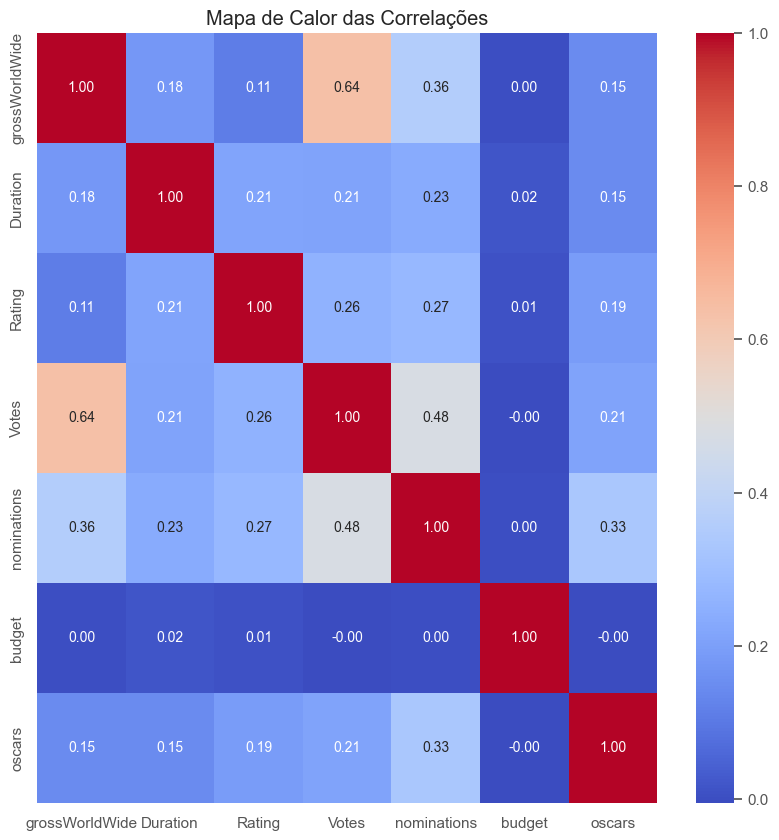

In [283]:
# Calcular a matriz de correlação
correlation_matrix = df[columns_to_corr_list].corr()
# Configurar o tamanho da figura
plt.figure(figsize=(10,10))

# Criar o mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Mostrar o plot
plt.title('Mapa de Calor das Correlações')
plt.show()

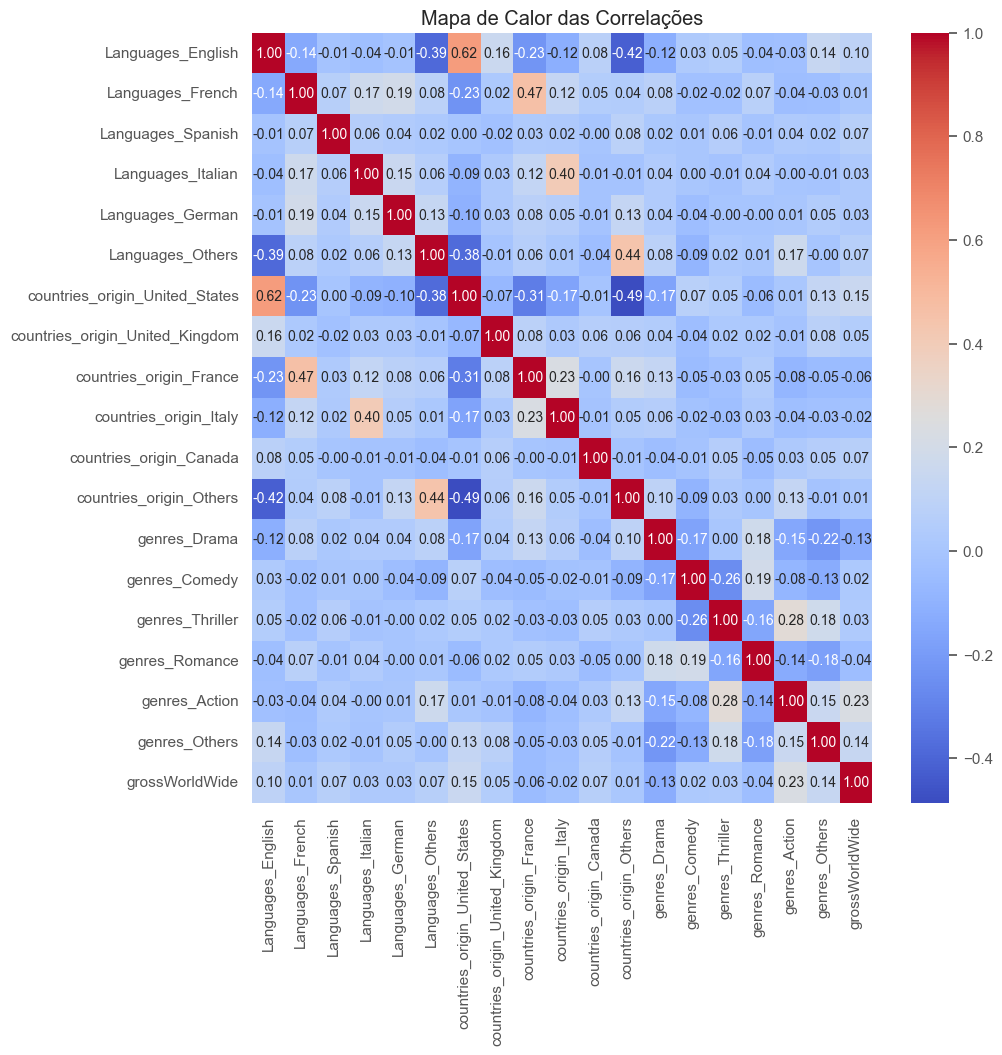

In [284]:
columns_to_corr_list = ['Languages_English', 'Languages_French', 'Languages_Spanish',
                        'Languages_Italian', 'Languages_German', 'Languages_Others',
                        'countries_origin_United_States', 'countries_origin_United_Kingdom',
                        'countries_origin_France', 'countries_origin_Italy',
                        'countries_origin_Canada', 'countries_origin_Others', 'genres_Drama',
                        'genres_Comedy', 'genres_Thriller', 'genres_Romance', 'genres_Action',
                        'genres_Others', 'grossWorldWide']

# Calcular a matriz de correlação
correlation_matrix = df[columns_to_corr_list].corr()
# Configurar o tamanho da figura
plt.figure(figsize=(10,10))

# Criar o mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Mostrar o plot
plt.title('Mapa de Calor das Correlações')
plt.show()

In [299]:
# Consider only numerica variables
df_ = df[["budget", "Rating", "Votes","grossWorldWide", "Duration", "nominations", "oscars"]].dropna(axis=0)

X = df_[["budget", "Rating", "Votes", "Duration", "nominations", "oscars"]]
y = df_['grossWorldWide']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

# # Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Four steps:

#Instantiate
lm_model = LinearRegression() 
lm_model.fit(X_train_scaled, y_train) 

LinearRegression()

In [300]:
# Prever no conjunto de teste
y_pred = lm_model.predict(X_test_scaled)

In [301]:
# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MSE: 7554561605820497.0
MAE: 32891465.89234863
RMSE: 86916981.11313173
R²: 0.3646943075615653


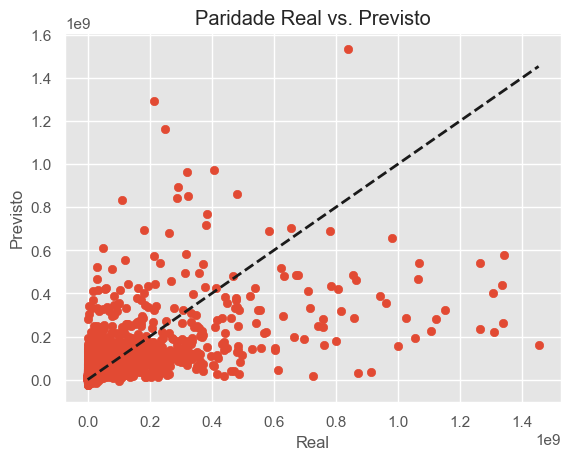

In [302]:
# Visualizar a paridade real vs. previsão
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Real')
plt.ylabel('Previsto')
plt.title('Paridade Real vs. Previsto')
plt.show()

In [303]:
coefs_df = pd.DataFrame()
coefs_df['est_int'] = X_train.columns
coefs_df['coefs'] = lm_model.coef_
coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)

In [304]:
coefs_df

,est_int,coefs,abs_coefs
2,Votes,7.725954e+07,7.725954e+07
4,nominations,1.186849e+07,1.186849e+07
1,Rating,-9.630907e+06,9.630907e+06
3,Duration,5.632584e+06,5.632584e+06
5,oscars,-6.978424e+05,6.978424e+05
0,budget,3.080623e+05,3.080623e+05


In [323]:
# Consider only numerica variables
df_ = df[["Rating", "Votes","grossWorldWide", "Duration"]].dropna(axis=0)

X = df_[["Votes"]]
y = df_['grossWorldWide']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

# # Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Four steps:

#Instantiate
lm_model = LinearRegression() 
lm_model.fit(X_train_scaled, y_train) 

LinearRegression()

In [324]:
# Prever no conjunto de teste
y_pred = lm_model.predict(X_test_scaled)

In [325]:
# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MSE: 7606533963572298.0
MAE: 32217904.456066698
RMSE: 87215445.67089191
R²: 0.3603236588790889


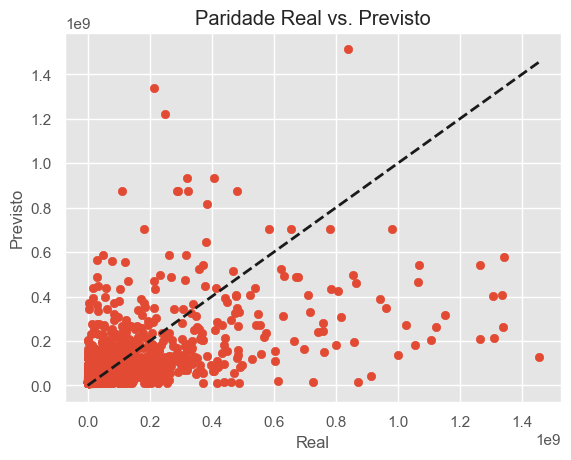

In [326]:
# Visualizar a paridade real vs. previsão
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Real')
plt.ylabel('Previsto')
plt.title('Paridade Real vs. Previsto')
plt.show()

In [327]:
coefs_df = pd.DataFrame()
coefs_df['est_int'] = X_train.columns
coefs_df['coefs'] = lm_model.coef_
coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)

coefs_df

,est_int,coefs,abs_coefs
0,Votes,8.158403e+07,8.158403e+07


Lastly, the revenue prediction attempt wasn't sucessfull considering a R² of 0,36. The features used were Budget, Durationg, Votes, Rating, nominations and oscars. The features with higher coeficients were Votes and Rating, while budget was not so important to predict revenue. These makes sense, since the popularity of a movie is strongly related to the number os telespectators that will pay for it. Also, this behaviour was expected since the correlation graph, due to the fact that Voting had the highest correlation with and Gross Word Wide, besides the other gross classifications. 

However, the model constructed so far has not a good performance. Not just the coefficient, but the absolute errors and means of squares show that the predict and the real values are very distinct. Due to this, would be useful to explore others features, or other models that may vahe a better fit with the target or fetures used. 